In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

In [3]:
#[실습 가이드]

#[탐색적 데이터 분석]
#1. 데이터 로드 및 확인
#2. 데이터 정보 확인
#3. missingno 패키지를 이용한 결측값을 가지는 컬럼 확인 및 처리
#-  age는 평균으로, cabin 'N', embarked 'N' 으로 대체
#4. age , cabin , embarked 빈도확인
#5. 성별에 따른 생존여부 확인 및 barplot를 이용한 시각화
#- 수업시간에 배운 시각화를 이용하여 다양한 정보를 탐색하세요
#6. sex , cabin , embarked 에 대한 라벨 인코딩


In [11]:
#1. 
titanic_df = pd.read_csv('./data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
#2.
display(titanic_df.info())
display(titanic_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


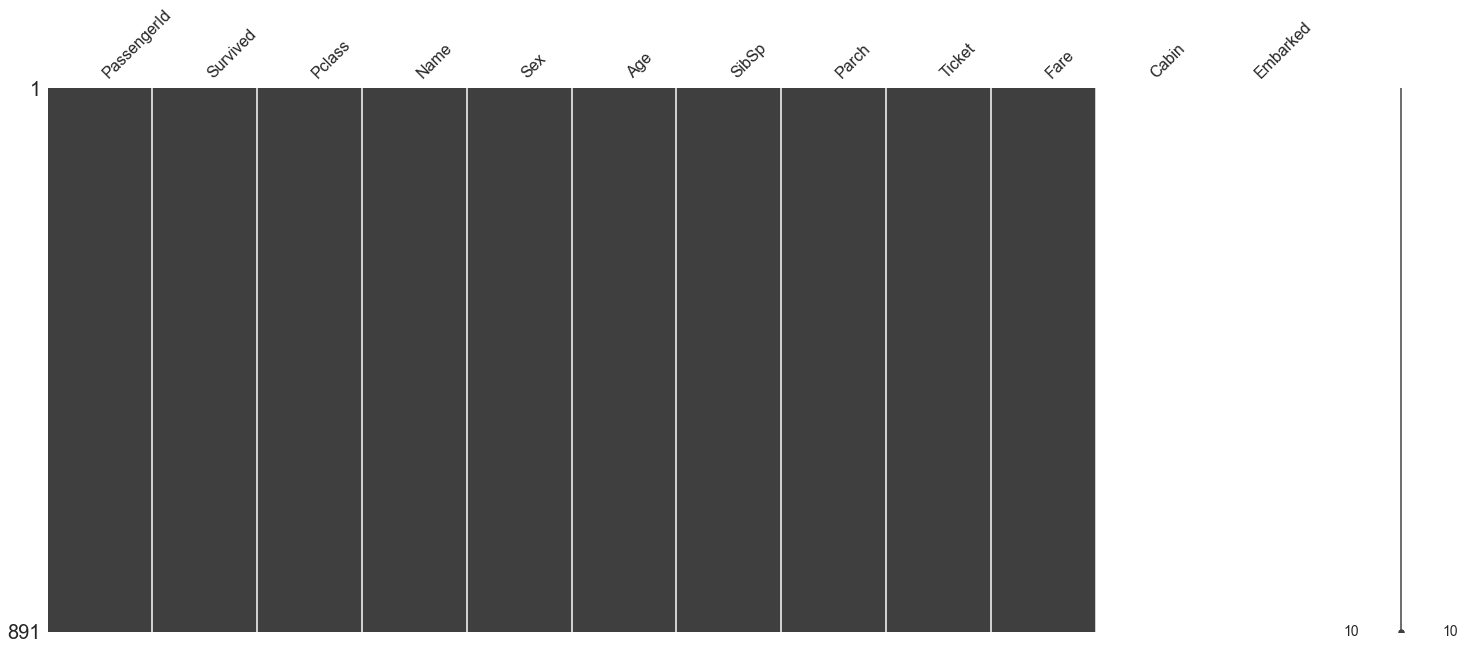

In [21]:
#3.
msno.matrix(titanic_df)
plt.show()

In [14]:
titanic_df['Age'] = titanic_df['Age'].mean()
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('N', inplace = True) 
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('N', inplace = True)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,29.699118,1,0,A/5 21171,7.2500,None,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,29.699118,1,0,PC 17599,71.2833,None,None
2,3,1,3,"Heikkinen, Miss. Laina",female,29.699118,0,0,STON/O2. 3101282,7.9250,None,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29.699118,1,0,113803,53.1000,None,None
4,5,0,3,"Allen, Mr. William Henry",male,29.699118,0,0,373450,8.0500,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,29.699118,0,0,211536,13.0000,None,None
887,888,1,1,"Graham, Miss. Margaret Edith",female,29.699118,0,0,112053,30.0000,None,None
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,None,None
889,890,1,1,"Behr, Mr. Karl Howell",male,29.699118,0,0,111369,30.0000,None,None


ValueError: min() arg is an empty sequence

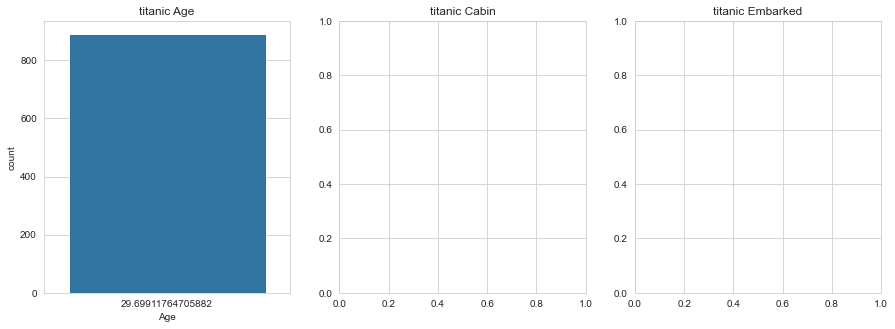

In [22]:
#4.

sns.set_style('whitegrid')

# 그래프 객체를 생성하기 위한 피겨객체 업어오기
fig = plt.figure(figsize=(15,5))

area1 = fig.add_subplot(1,3,1)
area1.set_title('titanic Age')
area2 = fig.add_subplot(1,3,2)
area2.set_title('titanic Cabin')
area3 = fig.add_subplot(1,3,3)
area3.set_title('titanic Embarked')

sns.countplot(x='Age', data=titanic_df, ax=area1)
sns.countplot(x='Cabin', data=titanic_df, ax=area2)
sns.countplot(x='Embarked', data=titanic_df, ax=area3)

plt.show()

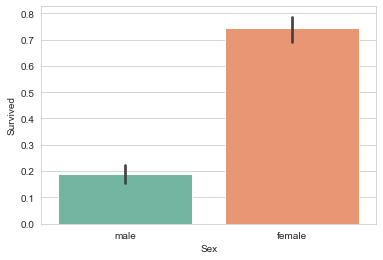

In [16]:
#5.
sns.barplot(x='Sex', y='Survived', data=titanic_df, palette = 'Set2')

In [17]:
#6.
new_df = titanic_df[['Sex','Cabin','Embarked']]
new_df['Sex'] = np.where(new_df['Sex'] == 'male','1','2')
new_df['Cabin'] = np.where(new_df['Cabin'] == 'N','1','2')
new_df['Embarked'] = np.where(new_df['Embarked'] == 'N','1','2')
new_df

C:\Users\i\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\i\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\i\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Sex,Cabin,Embarked
0,1,2,2
1,2,2,2
2,2,2,2
3,2,2,2
4,1,2,2
...,...,...,...
886,1,2,2
887,2,2,2
888,2,2,2
889,1,2,2


In [ ]:
#[ML학습]
#1. 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출
 # PassengerId, Name, Ticket 컬럼은 제거
 # 타겟은 survived
#2. 80:20 으로 데이터 분리(train_test_split)
#3. 의사결정트리를 이용한 학습, 예측 및 정확도 확인
#4. KFold=5 를 이용한 교차검증 및 평균정확도 확인
#5. cross_val_score 를 이용한 교차검증 및 평균정확도 확인
#6. GridSearchCV 를 이용한 교차검증 및 평균정확도 확인
#- 하이퍼 파라미터 적용해보기

In [31]:
#1.
titanic = pd.read_csv('./data/titanic_train.csv')
titan_df = titanic.drop(['PassengerId', 'Name', 'Ticket'] ,axis = 1)

titan_label = titan_df['Survived']
titan_df = titan_df.drop(['Survived'], axis = 1)

titan_df['Age'] = titan_df['Age'].mean()
titan_df['Cabin'] = titan_df['Cabin'].fillna('N', inplace = True) 
titan_df['Embarked'] = titan_df['Embarked'].fillna('N', inplace = True)

titan_df['Sex'] = np.where(titan_df['Sex'] == 'male','1','2')
titan_df['Cabin'] = np.where(titan_df['Cabin'] == 'N','1','2')
titan_df['Embarked'] = np.where(titan_df['Embarked'] == 'N','1','2')

titan_data = titan_df.values

In [32]:
titan_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [33]:
#2.
X_train, X_test, y_train, y_test = train_test_split(titan_data, titan_label, 
                                   test_size=0.2,              # 테스트용 데이터 20%, 트레이닝 80%
                                   random_state=50)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[3 '2' 29.69911764705882 ... 21.075 '2' '2']
 [3 '1' 29.69911764705882 ... 7.55 '2' '2']
 [3 '1' 29.69911764705882 ... 7.75 '2' '2']
 ...
 [3 '2' 29.69911764705882 ... 24.15 '2' '2']
 [3 '1' 29.69911764705882 ... 46.9 '2' '2']
 [3 '1' 29.69911764705882 ... 7.7958 '2' '2']]
[[1 '2' 29.69911764705882 ... 79.65 '2' '2']
 [2 '1' 29.69911764705882 ... 13.8625 '2' '2']
 [3 '1' 29.69911764705882 ... 8.05 '2' '2']
 ...
 [3 '2' 29.69911764705882 ... 7.775 '2' '2']
 [3 '1' 29.69911764705882 ... 7.75 '2' '2']
 [3 '2' 29.69911764705882 ... 7.925 '2' '2']]
567    0
648    0
790    0
618    1
77     0
      ..
132    0
289    1
109    1
480    0
688    0
Name: Survived, Length: 712, dtype: int64
558    1
547    1
494    0
679    1
7      0
      ..
756    0
37     0
554    1
459    0
2      1
Name: Survived, Length: 179, dtype: int64


In [34]:
#3.
titan_dtc = DecisionTreeClassifier(random_state=50)
titan_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [35]:
prediction = titan_dtc.predict(X_test)
print('y_test\n', y_test)
print('prediction\n', prediction)

y_test
 558    1
547    1
494    0
679    1
7      0
      ..
756    0
37     0
554    1
459    0
2      1
Name: Survived, Length: 179, dtype: int64
prediction
 [1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1]


In [36]:
print('예측 정확도 : {0: .2f}'.format( accuracy_score(y_test, prediction)) )

예측 정확도 :  0.78


In [37]:
#4.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('iris shape', titan_data.shape[0])

iris shape 891


In [38]:
n_iter = 0
for train_idx , test_idx in kfold.split(titan_data) :
    #print(train_idx, test_idx)
    X_train , X_test = titan_data[train_idx], titan_data[test_idx]
    #print('X_train\n', X_train)
    #print('X_test\n', X_test)
    y_train, y_test = titan_label[train_idx] , titan_label[test_idx]
    #print('y_train\n', y_train)
    #print('y_test\n', y_test)
    
    # 학습을 진행하겠다면?
    titan_dtc.fit(X_train, y_train)
    
    # 예측
    titan_pred = titan_dtc.predict(X_test)
    
    # 정확도 측정
    n_iter += 1
    accuracy = np.round( accuracy_score(y_test, titan_pred), 4)
    print('\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 : {}'.format(n_iter, accuracy, X_train.shape[0], X_test.shape[0]))
    
    cv_accuracy.append(accuracy)
print('\n\n')
    
print('\n 평균검증 정확도 : ', np.mean(cv_accuracy))


1 교차검증 정확도 : 0.7318, 학습 데이터 크기 : 712, 검증 데이터 크기 : 179

2 교차검증 정확도 : 0.7753, 학습 데이터 크기 : 713, 검증 데이터 크기 : 178

3 교차검증 정확도 : 0.8315, 학습 데이터 크기 : 713, 검증 데이터 크기 : 178

4 교차검증 정확도 : 0.7753, 학습 데이터 크기 : 713, 검증 데이터 크기 : 178

5 교차검증 정확도 : 0.8034, 학습 데이터 크기 : 713, 검증 데이터 크기 : 178




 평균검증 정확도 :  0.78346


In [39]:
#5.
scoring = cross_validate(titan_dtc , titan_data , titan_label , scoring='accuracy', cv=5)

print('교차 검증 정보 : ', scoring)
print('교차 검증 시간 : ', scoring['fit_time'])
print('*' * 50)
print('교차 검증별 정확도 : ' , scoring['test_score'])
print('평균 검증 정확도 : ', np.round(np.mean(scoring['test_score']),2))

교차 검증 정보 :  {'fit_time': array([0.00499773, 0.00200081, 0.00300217, 0.00300193, 0.00199723]), 'score_time': array([0.        , 0.00099921, 0.0009985 , 0.        , 0.00099945]), 'test_score': array([0.73184358, 0.79775281, 0.84269663, 0.78651685, 0.79775281])}
교차 검증 시간 :  [0.00499773 0.00200081 0.00300217 0.00300193 0.00199723]
**************************************************
교차 검증별 정확도 :  [0.73184358 0.79775281 0.84269663 0.78651685 0.79775281]
평균 검증 정확도 :  0.79


In [40]:
#6.
params = {'criterion' : ['gini', 'entropy'], 
         'splitter' : ['random', 'best'],
         'max_depth' : [1,2,3,4,5],
         'min_samples_split' : [2,3,4]}

grid_titan = GridSearchCV(titan_dtc,
                             param_grid = params,
                             cv=5,
                             refit=True)

# 학습
grid_titan.fit(X_train, y_train)
grid_titan.cv_results_
scores_df = pd.DataFrame(grid_titan.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782547,25,0.804196,0.762238,0.825175,0.774648,0.746479
1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782547,25,0.804196,0.762238,0.825175,0.774648,0.746479
2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782547,25,0.804196,0.762238,0.825175,0.774648,0.746479
3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782547,25,0.804196,0.762238,0.825175,0.774648,0.746479
4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782547,25,0.804196,0.762238,0.825175,0.774648,0.746479
5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782547,25,0.804196,0.762238,0.825175,0.774648,0.746479
6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.771358,49,0.748252,0.762238,0.825175,0.774648,0.746479
7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.771358,49,0.748252,0.762238,0.825175,0.774648,0.746479
8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.771358,49,0.748252,0.762238,0.825175,0.774648,0.746479
9,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.771358,49,0.748252,0.762238,0.825175,0.774648,0.746479


In [41]:
print('최적의 파라미터 : ', grid_titan.best_params_ )
print('높은 정확도 : ', grid_titan.best_score_ )

최적의 파라미터 :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}
높은 정확도 :  0.8050231458682164


In [42]:
estimator = grid_titan.best_estimator_
prediction = estimator.predict(X_test)
print('answer : ', y_test)
print('guess : ', prediction)
print('테스트 세트의 정확도 : ', accuracy_score(y_test, prediction))

answer :  713    0
714    0
715    0
716    1
717    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 178, dtype: int64
guess :  [0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0]
테스트 세트의 정확도 :  0.8202247191011236
